### Name: Feras Nezar Elkharrat
### Student ID: 7000454
### Tutorial Section: TUT 1

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Let's get a general idea of what we're dealing with (and drop some columns that we definitely won't be using at all to be frank)

In [25]:
data = pd.read_csv('data.csv')
# data.info()
data.drop(['Unnamed: 0', 'offer_description'], axis=1, inplace=True)


### We're going to be using the fuel type column in both research questions so let's clean it up a bit. Let's take a look at the values inside the column.

In [26]:
data['fuel_type'].value_counts().head(25)

fuel_type
Petrol           143280
Diesel            86421
Hybrid            12607
Electric           5967
LPG                1255
CNG                 508
Diesel Hybrid       476
Other               178
Unknown              96
Hydrogen             82
Automatic            26
Manual               18
01/2023              13
Ethanol              10
02/2023               5
1.000 km              3
10/2022               3
03/2017               3
03/2023               3
03/2018               2
04/2022               2
10/2013               2
08/2018               2
06/2004               2
02/2018               2
Name: count, dtype: int64

### Now we extract our 9 relevant values of fuel and drop the rest

In [27]:
data = data[data['fuel_type'].isin(['Diesel', 'Petrol', 'Hybrid', 'Electric', 'LPG', 'CNG', 'Diesel Hybrid', 'Hydrogen', 'Ethanol'])]
data['fuel_type'].value_counts()

fuel_type
Petrol           143280
Diesel            86421
Hybrid            12607
Electric           5967
LPG                1255
CNG                 508
Diesel Hybrid       476
Hydrogen             82
Ethanol              10
Name: count, dtype: int64

# Research Question 1: What are the top 10 least expensive car brands per fuel type?

## 1.1. Just some EDA to get a general idea of what we're dealing with

In [28]:
df = data[['brand', 'price_in_euro', 'fuel_type']]
df.isna().sum()

brand            0
price_in_euro    0
fuel_type        0
dtype: int64

### Below we observe that the most common fuel type is petrol, followed by diesel and then hybrid with the least common being Hydrogen and Ethanol. We will be focusing on them all for the sake of inclusion and future proofing.

In [29]:
df['fuel_type'].value_counts()

fuel_type
Petrol           143280
Diesel            86421
Hybrid            12607
Electric           5967
LPG                1255
CNG                 508
Diesel Hybrid       476
Hydrogen             82
Ethanol              10
Name: count, dtype: int64

### Let's also check on the brand column for erroneous values

In [30]:
df['brand'].value_counts()

brand
volkswagen       33232
mercedes-benz    27195
audi             21134
opel             20352
bmw              19779
ford             18753
skoda            14010
seat             11908
renault           8685
toyota            8190
hyundai           6979
peugeot           5841
kia               5720
fiat              5028
mini              4290
mazda             4203
volvo             4154
citroen           4068
porsche           3941
nissan            3778
dacia             3363
land-rover        3071
jeep              1743
smart             1641
alfa-romeo        1437
jaguar            1398
mitsubishi         924
honda              785
maserati           696
dodge              665
ferrari            585
bentley            539
lamborghini        360
ssangyong          342
aston-martin       277
saab               233
isuzu              205
daihatsu           203
chevrolet          191
lada               190
cadillac           157
infiniti           112
lancia             105
daewo

In [31]:
df['brand'].isnull().sum()

0

### Finally, if we inspect the price column we can see that there's some chicanery going on with the values

In [32]:
df['price_in_euro'].dtypes

dtype('O')

### Firstly, let's convert the price column to a float using the to_numeric method with coerce to convert the non-numeric values to NaN

In [33]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

C:\Users\feras\AppData\Local\Temp\ipykernel_5344\4257735957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')


In [34]:
df['price_in_euro'].isna().sum() / len(df) * 100

0.0

### My rationale behind just dropping rows with missing prices is that we could never impute (or guess) the price of a used car since it can widely vary according to a tonne of factors (mileage, condition, etc.). I realise that we could have also dropped outliers but there was no real way of knowing whether this data was erroneous or just a really expensive car that was sold for the price that it was actually worth. So for the sake of keeping this as close to the original data as possible, I decided to go ahead with keeping the "outliers" in the dataset.

In [35]:
df = df.dropna(subset=['price_in_euro'])

In [36]:
df.isnull().sum()

brand            0
price_in_euro    0
fuel_type        0
dtype: int64

## 1.2. Data Analysis

### Now that we're ready, let's make a dataframe for each fuel type and group them into one 3x3 grid using matplotlib. This was achieved by first filtering each fuel type into it's own dataframe. Then, I computed each dataframe's mean price and sorted them in ascending order. Finally, I plotted each brand's mean price against the brand column and set the title of each subplot to the fuel type.

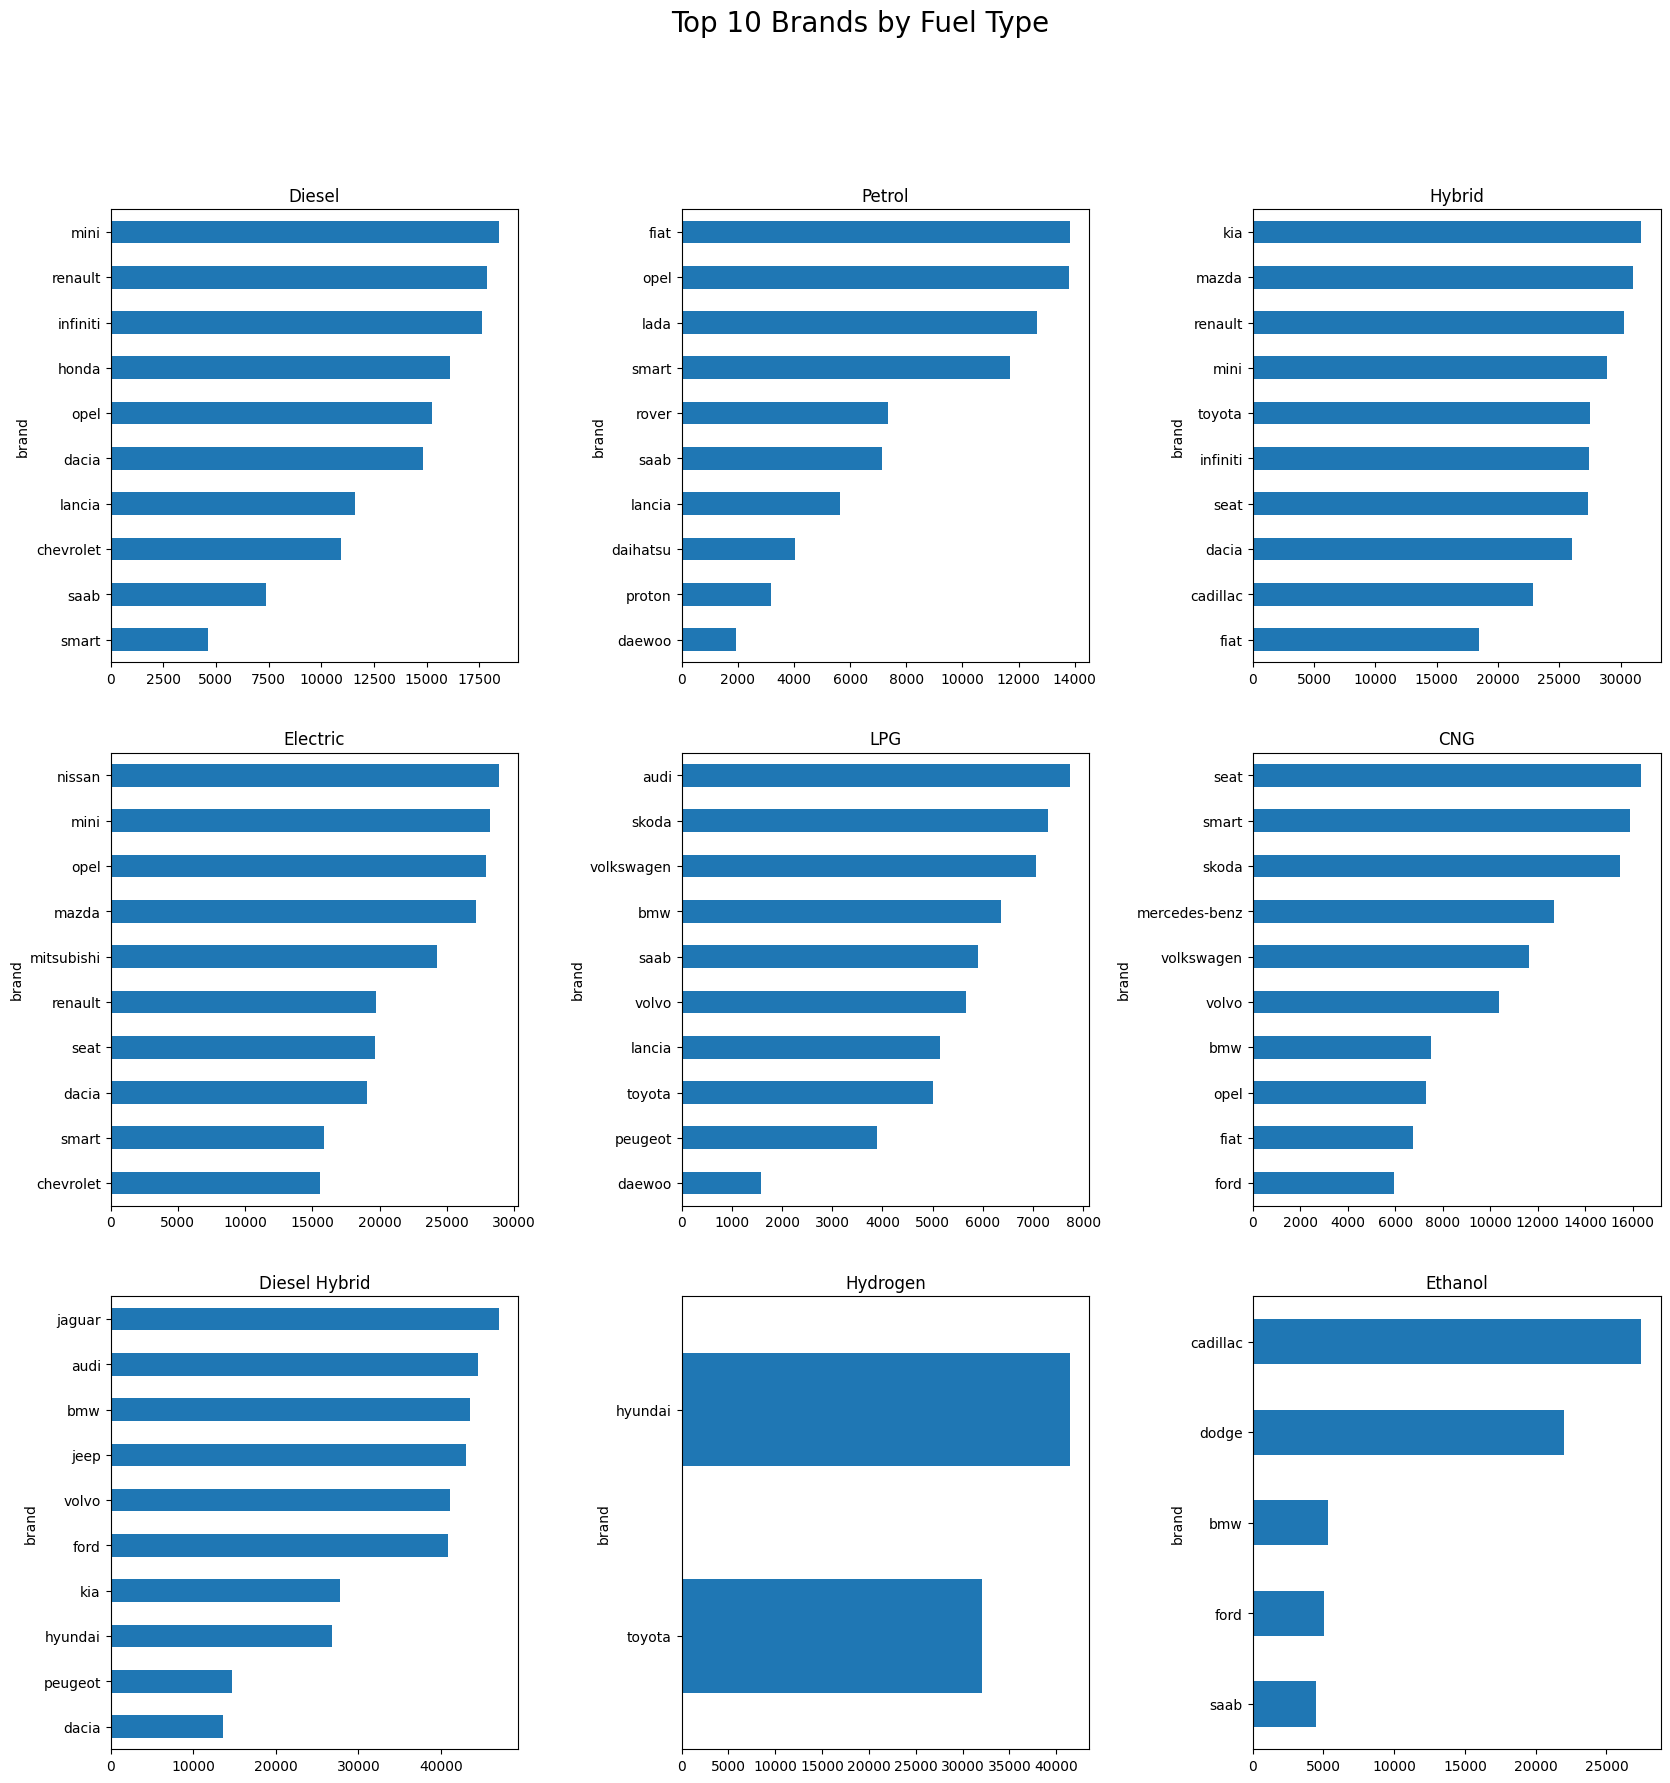

In [37]:
# Here we extract the 9 fuel types we're interested in using a simple query filter
df_diesel = df[df['fuel_type'] == 'Diesel']
df_petrol = df[df['fuel_type'] == 'Petrol']
df_hybrid = df[df['fuel_type'] == 'Hybrid']
df_electric = df[df['fuel_type'] == 'Electric']
df_lpg = df[df['fuel_type'] == 'LPG']
df_cng = df[df['fuel_type'] == 'CNG']
df_diesel_hybrid = df[df['fuel_type'] == 'Diesel Hybrid']
df_hydrogen = df[df['fuel_type'] == 'Hydrogen']
df_ethanol = df[df['fuel_type'] == 'Ethanol']

# Here we plot the average price of each brand per fuel type
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
fig.suptitle('Top 10 Brands by Fuel Type', fontsize=20)
fig.subplots_adjust(wspace=0.4)
df_diesel.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[0, 0], title='Diesel')
df_petrol.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[0, 1], title='Petrol')
df_hybrid.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[0, 2], title='Hybrid')
df_electric.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[1, 0], title='Electric')
df_lpg.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[1, 1], title='LPG')
df_cng.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[1, 2], title='CNG')
df_diesel_hybrid.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[2, 0], title='Diesel Hybrid')
df_hydrogen.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[2, 1], title='Hydrogen')
df_ethanol.groupby('brand')['price_in_euro'].mean().sort_values().head(10).plot(kind='barh', ax=axes[2, 2], title='Ethanol')

plt.show()

## Conclusion for Research Question 1:

### The least expensive car brands, averaged across different fuel types in Germany, are as follows:

- **Diesel:** Smart
- **Petrol & LPG:** Daewoo
- **Hybrid:** Fiat
- **Electric:** Chevrolet
- **CNG:** Ford
- **Diesel Hybrid:** Dacia
- **Hydrogen:** Toyota
- **Ethanol:** Saab


## Research Question 2: What are the 5 most efficient diesel car models per year sold in the past 5 years?

## 2.1. Again, some EDA to get a general idea of what we're dealing with

In [38]:
# 1.1 data cleaning of relevant columns
df2 = data[['model', 'year', 'fuel_type', 'fuel_consumption_l_100km']]

### Models seem to make sense so far

In [39]:
df2['model'].value_counts()

model
Volkswagen Golf        7579
Opel Astra             4356
Opel Corsa             4281
SEAT Leon              4112
Ford Focus             3869
                       ... 
Mercedes-Benz S 680       1
Toyota 4-Runner           1
Infiniti EX35             1
Toyota MR 2               1
Chevrolet 2500            1
Name: count, Length: 1311, dtype: int64

### Years, however, seem to be a bit off

In [43]:
df2['year'].value_counts()

year
2019    29201
2018    24055
2023    21075
2022    20616
2017    18924
2020    18538
2021    15994
2016    15057
2015    12702
2014    10618
2013     9322
2012     7989
2011     7380
2009     6426
2010     6039
2008     4841
2007     4016
2006     3971
2005     3397
2004     2644
2003     2101
2002     1580
2001     1213
2000      960
1999      744
1998      466
1997      340
1996      227
1995      170
Name: count, dtype: int64

### Let's use the same method as before to convert the year column to a float

In [42]:
df2['year'] = pd.to_numeric(df2['year'], errors='coerce')

C:\Users\feras\AppData\Local\Temp\ipykernel_5344\3637844793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = pd.to_numeric(df2['year'], errors='coerce')


### Now that we've got the year column in a usable format, let's check for outliers. We notice that there are some abnormally high values in the year column. Let's check them out!

<Axes: >

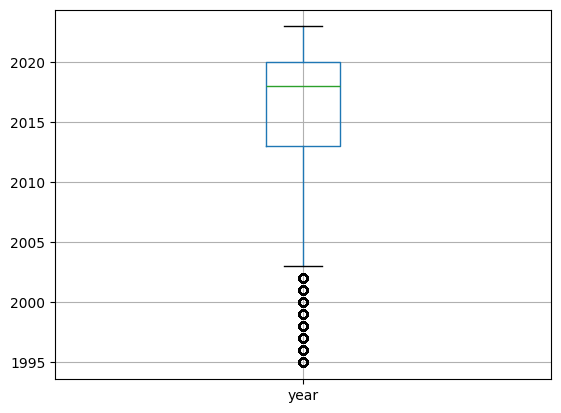

In [44]:
df2.boxplot(column='year')

### If you look at the Kaggle page for this dataset, the creator mentions that this dataset covers cars manufactured between the years 1995 and 2023. So, we can safely assume that any values above 2023 or below 1995 are erroneous and can be safely dropped.

In [45]:
df2 = df2[(df2['year'] >= 1995) & (df2['year'] <= 2023)]

### Let's put a bit of work into the fuel consumption column to make it usable. First and foremost, we need to remove the units from the column and convert it to a float. We can do this by utilizing the str.replace() method to remove the units, replace the commas with dots and then using the to_numeric() method to convert the column to a float.

In [46]:
# remove everything after the first space
df2['fuel_consumption_l_100km'] = df2['fuel_consumption_l_100km'].str.split(' ').str[0]

df2['fuel_consumption_l_100km'].value_counts()

fuel_consumption_l_100km
4,9    8163
5,1    7657
5,5    7615
5,9    7521
5,3    7454
       ... 
462       1
34        1
597       1
603       1
93        1
Name: count, Length: 430, dtype: int64

In [47]:
# replace , with .
df2['fuel_consumption_l_100km'] = df2['fuel_consumption_l_100km'].str.replace(',', '.')

In [48]:
# use to_numeric to convert to float
df2['fuel_consumption_l_100km'] = pd.to_numeric(df2['fuel_consumption_l_100km'], errors='coerce')

### Since we're only interested in diesel cars (and the most efficient ones at that), let's filter the dataset to only include diesel cars and anything below 65 litres per 100km.

In [49]:
# drop values of fuel consumption above 65 and non diesel cars
df2 = df2[(df2['fuel_consumption_l_100km'] <= 65) & (df2['fuel_type'] == 'Diesel')]

In [50]:
df2['fuel_consumption_l_100km'].isnull().sum()

0

### We now encode our data using LabelEncoder so we can impute any missing values of the fuel consumption column. We do this because we can't just drop the rows with missing values since we'd be losing a lot of data. So, we impute the missing values based on the year and model of the car. We do this by first grouping the data by year and model and then using the transform method to impute the missing values of the column.

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['model'] = le.fit_transform(df2['model'])

df2['model'].value_counts().sort_values()

model
120       1
462       1
450       1
461       1
14        1
       ... 
482    1536
567    1820
18     1973
612    1977
21     2138
Name: count, Length: 688, dtype: int64

### Do note that we had to include a (currently) experimental feature of scikit-learn to get this to work. This feature allowed us to use iterative imputation on a our encoded column. We then fit and transform the data to get our imputed values.

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df2['fuel_consumption_l_100km'] = imputer.fit_transform(df2[['model', 'year', 'fuel_consumption_l_100km']])[:, 2]

df2['fuel_consumption_l_100km'].isnull().sum()

0

### Reverse the encoding to get the original values back

In [53]:
# translate model column back to original values
df2['model'] = le.inverse_transform(df2['model'])

## 1.2. Data Analysis

### Once again, we filter our data by grouping our model by the fuel consumption column and then sorting them in ascending order. We then plot the top 5 most efficient cars per year in the last 5 years.

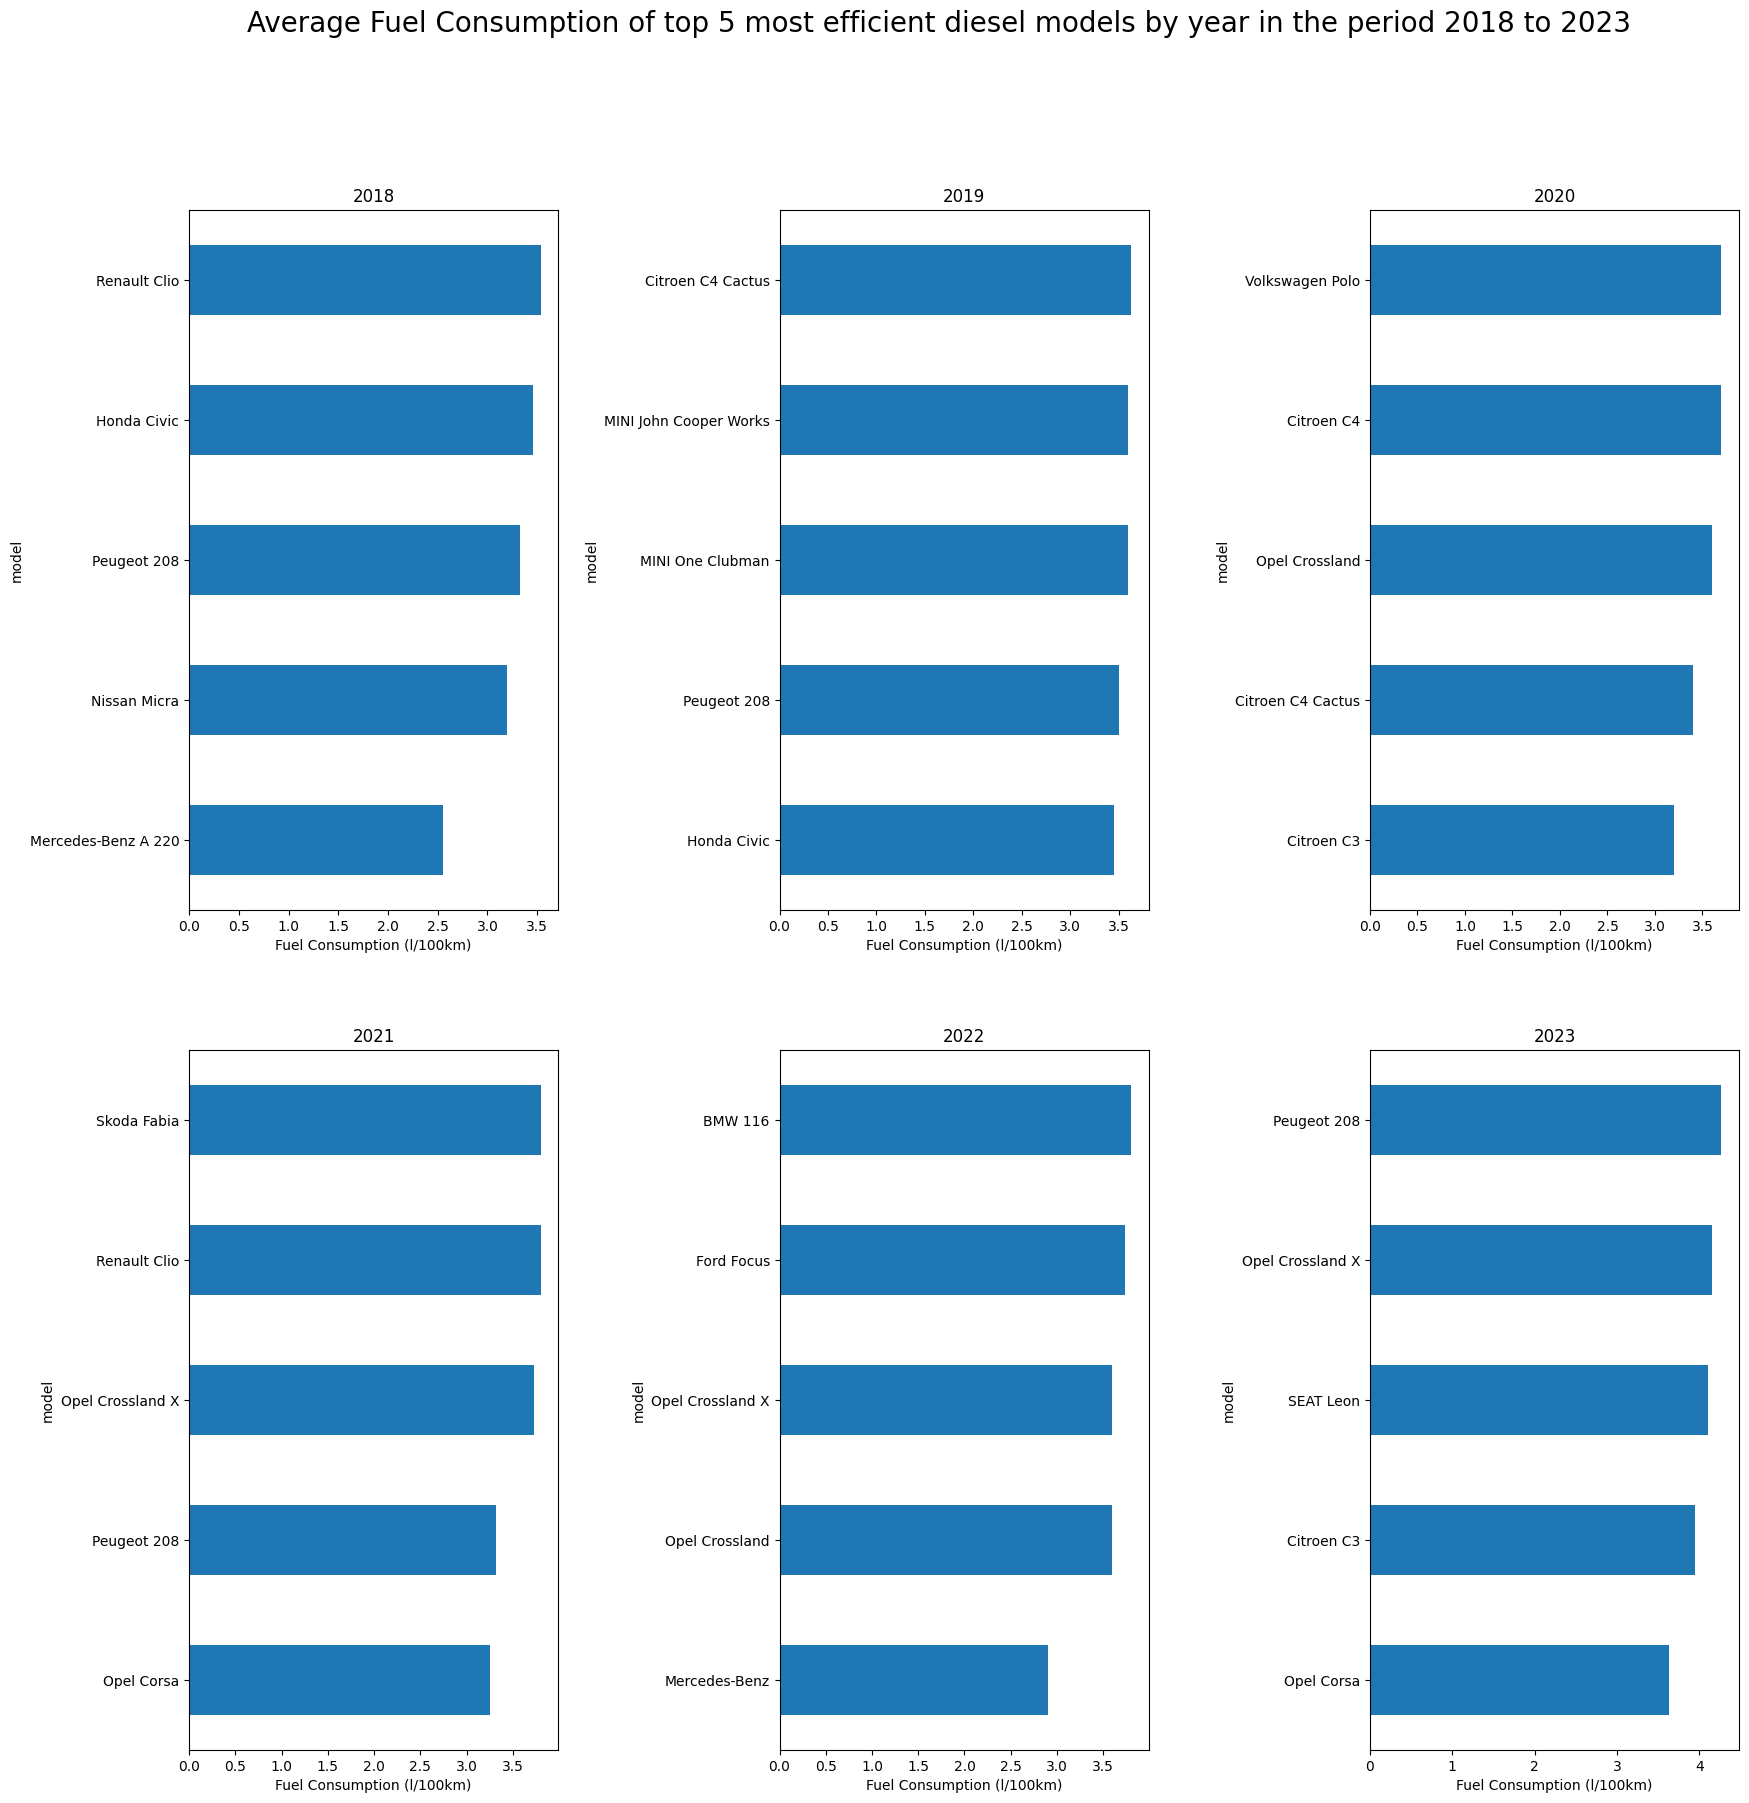

In [55]:
# group the data by model and year and plot the average fuel consumption per each year in one figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
fig.suptitle('Average Fuel Consumption of top 5 most efficient diesel models by year in the period 2018 to 2023', fontsize=20)
df2_2018 = df2[df2['year'] == 2018]
df2_2018.groupby('model')['fuel_consumption_l_100km'].mean().sort_values().head(5).plot(kind='barh', ax=axes[0, 0])
axes[0, 0].set_title('2018')
df2_2019 = df2[df2['year'] == 2019]
df2_2019.groupby('model')['fuel_consumption_l_100km'].mean().sort_values().head(5).plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_title('2019')
df2_2020 = df2[df2['year'] == 2020]
df2_2020.groupby('model')['fuel_consumption_l_100km'].mean().sort_values().head(5).plot(kind='barh', ax=axes[0, 2])
axes[0, 2].set_title('2020')
df2_2021 = df2[df2['year'] == 2021]
df2_2021.groupby('model')['fuel_consumption_l_100km'].mean().sort_values().head(5).plot(kind='barh', ax=axes[1, 0])
axes[1, 0].set_title('2021')
df2_2022 = df2[df2['year'] == 2022]
df2_2022.groupby('model')['fuel_consumption_l_100km'].mean().sort_values().head(5).plot(kind='barh', ax=axes[1, 1])
axes[1, 1].set_title('2022')
df2_2023 = df2[df2['year'] == 2023]
df2_2023.groupby('model')['fuel_consumption_l_100km'].mean().sort_values().head(5).plot(kind='barh', ax=axes[1, 2])
axes[1, 2].set_title('2023')
# increase space between subplots
plt.subplots_adjust(wspace=0.6)


for ax in axes.flat:
    ax.set(xlabel='Fuel Consumption (l/100km)')

plt.show()


## Conclusion for Research Question 2:

### The most efficient used diesel car models per year in the last 5 years are as follows:

- **2018:** Mercedes-Benz A 220
- **2019:** Honda Civic
- **2020:** Citroen C3
- **2021 & 2023:** Opel Corsa
- **2022:** Mercedes-Benz
